In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

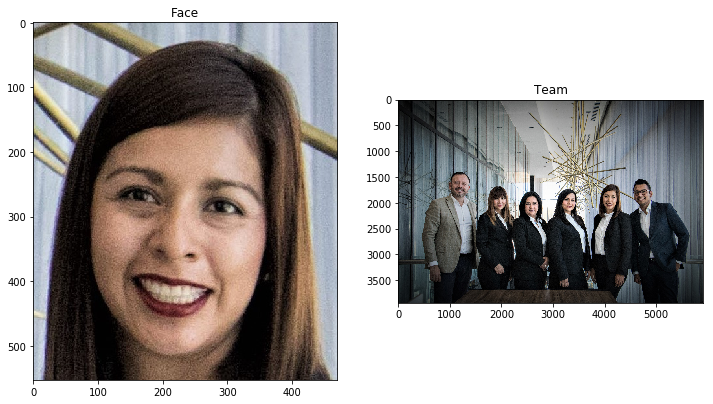

In [4]:
# load image 
face = cv2.imread('images/face.jpeg')
team = cv2.imread('images/Team.jpeg')


# convert to rgb 
training_image = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

#query image
query_image = cv2.cvtColor(team, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,9))
plt.subplot(121)
plt.title('Face')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Team')
plt.imshow(query_image)
plt.show()

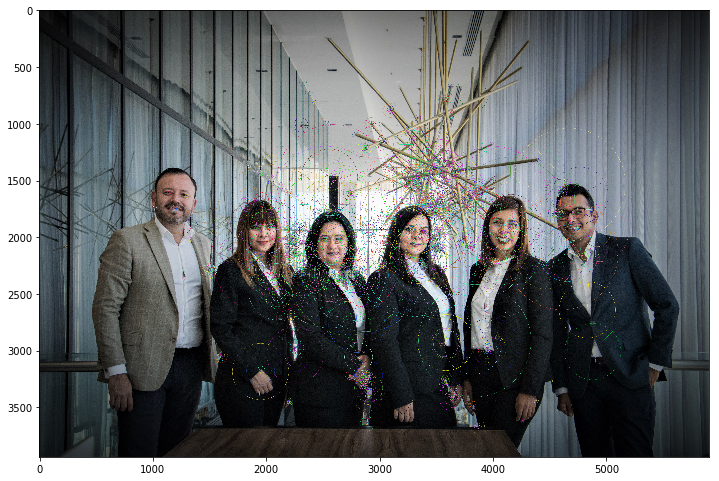

In [12]:
import copy
# convert to gray 
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# query gray
query_gray  = cv2.cvtColor(query_image, cv2.COLOR_RGB2GRAY)


# configure orb
orb = cv2.ORB_create(2000, 2.0)



keypoints_train, descriptor_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptor_query = orb.detectAndCompute(query_gray, None)


# query image 
query_image_keyp = copy.copy(query_image)

cv2.drawKeypoints(query_image, keypoints_query, query_image_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,9 ))
plt.imshow(query_image_keyp)

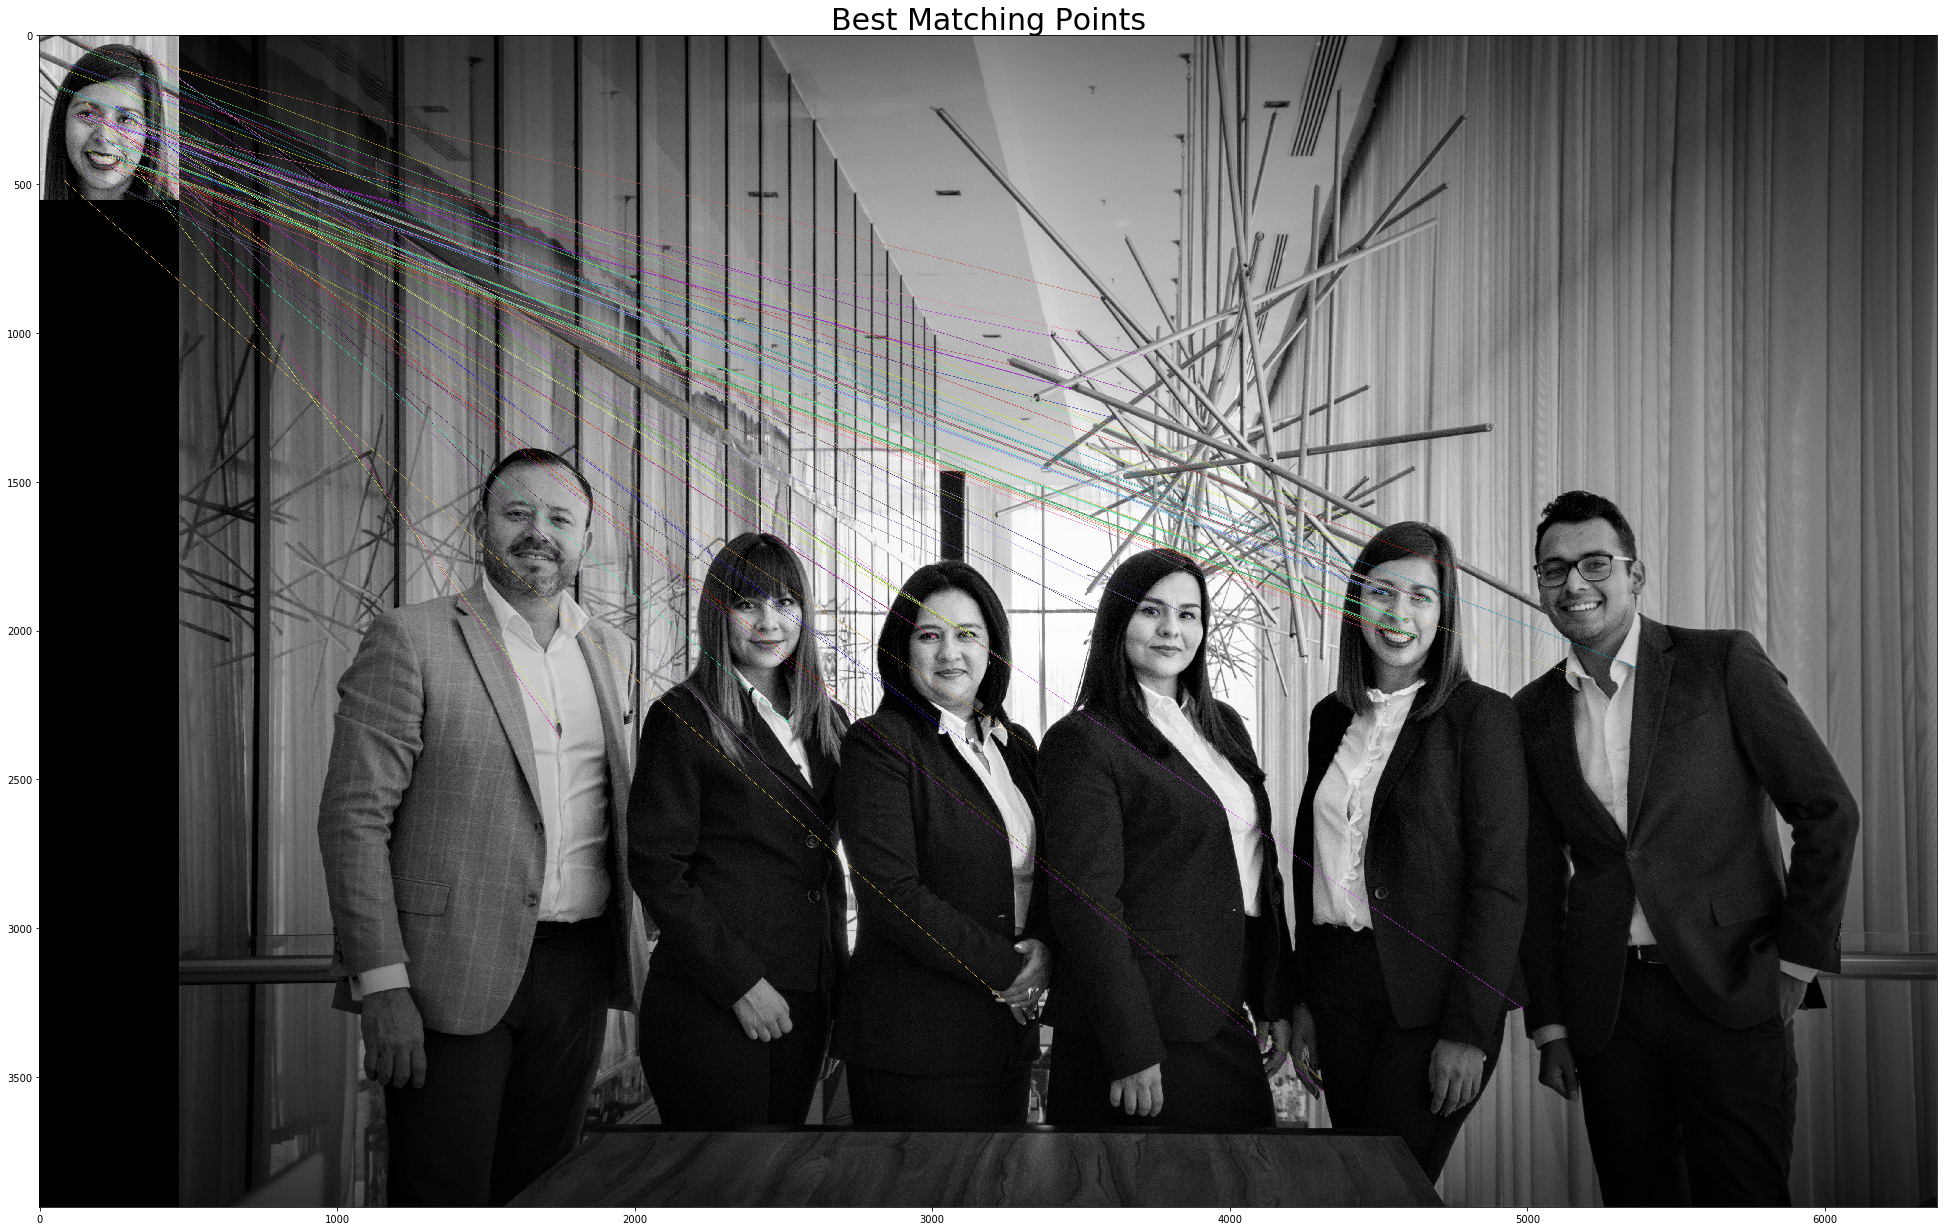

Number of Keypoints Detected In The Training Image:  1441
Number of Keypoints Detected In The Query Image:  1976

Number of Matching Keypoints Between The Training and Query Images:  360


In [15]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptor_train, descriptor_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))